<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/tutorial_of_pygad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a ><img src="https://i.ibb.co/hd2LFFt/Ekran-Resmi-2022-07-20-22-35-22.png" alt="Ekran-Resmi-2022-07-20-22-35-22" border="0"></a>

In [19]:
# Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pygad
!pip install mplcyberpunk
import pygad
import numpy
import pygad
import pygad.nn
import pygad.gann
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* Vanishing gradients occur while training deep neural networks using gradient-based optimization methods. It occurs due to the nature of the backpropagation algorithm that is used to train the neural network. In such methods, during each iteration of training each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight.


![](https://2900157524-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LZMLRvaju5sqPs7pYTX%2F-Lrp-FwxhWogOLC4-q3F%2F-LrPm3c4Pn1RXIZXgXxL%2Fothertechniques.png?generation=1571773560222799&alt=media)

* Deep neural network learning can be formulated as a non-convex optimization problem. Existing optimization algorithms, e.g., Adam, can learn the models fast, but may get stuck in local optima easily.  Adam together with its many optimizer algorithms have been shown to be effective for optimizing a large group of problems. However, for the non-convex objective functions of deep learning models, Adam cannot guarantee to identify the globally optimal solutions, whose iterative updating process may inevitably get stuck in local optima. The performance of Adam is not very robust, which will be greatly degraded for the objective function with non-smooth shape or learning scenarios polluted by noisy data. Furthermore, the distributed computation process of Adam requires heavy synchronization, which may hinder its adoption in large-cluster based distributed computational platforms.

* On the other hand, genetic algorithm (GA), a metaheuristic algorithm inspired by the process of natural selection in evolutionary algorithms, has also been widely used for learning the solutions of many optimization problems. In GA, a population of candidate solutions will be initialized and evolved towards better ones. Several attempts have also been made to use GA for training deep neural network models instead of the gradient descent based methods. GA has demonstrated its outstanding performance in many learning scenarios, like non-convex objective function containing multiple local optima, objective function with non-smooth shape, as well as a large number of parameters and noisy environments. GA also fits the parallel/distributed computing setting very well, whose learning process can be easily deployed on parallel/distributed computing platforms. Meanwhile, compared with Adam, GA may take more rounds to converge in addressing optimization objective functions.

[Reference](https://arxiv.org/pdf/1805.07500.pdf)

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/asheta66/CNN/main/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## I wouldn't 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
y = df.output
X = df.drop(columns="output")

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = .2,
                                                    random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [23]:
# My keras tool-kit :D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
import tensorflow as tf
from keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras import callbacks
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax
import random
import mplcyberpunk
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/32
16/16 [==============================] - 1s 13ms/step - loss: 1.5417 - accuracy: 0.4669 - val_loss: 0.5850 - val_accuracy: 0.7049 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/32
16/16 [==============================] - 0s 4ms/step - loss: 0.8491 - accuracy: 0.8058 - val_loss: 0.9444 - val_accuracy: 0.8033 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/32
16/16 [==============================] - 0s 6ms/step - loss: 0.6596 - accuracy: 0.7727 - val_loss: 0.5353 - val_accuracy: 0.7213 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/32
16/16 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.7769 - val_loss: 0.4904 - val_accuracy: 0.7869 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776

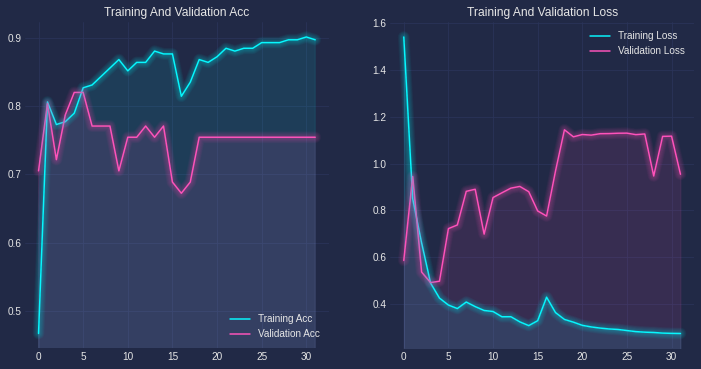

CPU times: user 3.93 s, sys: 154 ms, total: 4.08 s
Wall time: 6.81 s


In [24]:
%%time
classifier = tf.keras.Sequential()
tf.compat.v1.reset_default_graph()
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform' , activation = 'relu', input_dim = X_train.shape[1])) 
# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the third hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

# Compiling the ANN 
classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

# Fitting the ANN to the Training set

r = classifier.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   callbacks=[callbacks.EarlyStopping(min_delta=0.0001,patience=40,restore_best_weights=True),
                             tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)],
                   batch_size=16,
                   epochs=32)

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(12, 6))
plt.style.use('cyberpunk')
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend()
mplcyberpunk.add_glow_effects()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

In [25]:
y_pred_tr = [1 if each >= 0.5 else 0 for each in classifier.predict(X_train)]
y_pred_ts = [1 if each >= 0.5 else 0 for each in classifier.predict(X_test)]
# 
print('Train Accuracy score: {0:0.2f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.2f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.3f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

Train Accuracy score: 0.90
Train ROC AUC score: 0.90
Test Accuracy score: 0.75
Test ROC-AUC score: 0.746
[[18 10]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



# Step by step genetic algorithm with PyGAD
### I have to say that this notebook was inspired by Christopher Nolan.
![](https://cdn.theatlantic.com/thumbor/DG2Xor4Hl_KmZCdCasjGod-MDlk=/190x0:2623x1825/1200x900/media/img/mt/2020/08/MCDINCE_EC040/original.jpg)

## Optimiception
### It's actually a big dilemma. It isn't alluring to have to optimize the Optimizer. So even though this notebook is the official "Tutorial of PyGAD", it's called "optimiception" for me.

In [26]:
# Inputs

array_X = X_train #.values (Scaler function return np array and pygad working with np.array)
array_y = y_train.values
array_X.shape,array_y.shape

((242, 13), (242,))

## Fitness function

* The PyGAD library works by allowing the users to customize the genetic algorithm for their own problems. Because the problems differ in how the fitness values are calculated, then PyGAD allows the user to use a custom function as a maximization fitness function. This function must accept 2 positional parameters representing the following:

    1. The solution.
    2. The solution index in the population.


* The fitness function must return a single number representing the fitness. The higher the fitness value, the better the solution.

* Here is the implementation of the fitness function for training a neural network. It uses the `pygad.nn.predict()` function to predict the class labels based on the current solution’s weights. The `pygad.nn.predict()` function uses the trained weights available in the trained_weights attribute of each layer of the network for making predictions.

* Based on such predictions, the classification accuracy is calculated. This accuracy is used as the fitness value of the solution. Finally, the fitness value is returned.

In [27]:
# Fitness function ``

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

## Callback generation

* After each generation of the genetic algorithm, the fitness function will be called to calculate the fitness value of each solution. Within the fitness function, the `pygad.nn.predict()` function is used for predicting the outputs based on the current solution’s trained_weights attribute. Thus, it is required that such an attribute is updated by weights evolved by the genetic algorithm after each generation.

* This callback function can be used to update the trained_weights attribute of layers of each network in the population.

* Here is the implementation for a function that updates the trained_weights attribute of the layers of the population networks.

* It works by converting the current population from the vector form to the matric form using the `pygad.gann.population_as_matrices()` function. It accepts the population as vectors and returns it as matrices.

* The population matrices are then passed to the `update_population_trained_weights()` method in the pygad.gann module to update the trained_weights attribute of all layers for all solutions within the population.

#### My contribution 
* I creating `verbose` function additionally, because
* I think the biggest handicap of this library is that it returns to all generations and their fitness result. Sometimes I create 10000 generations and get distracted by the generation's returns.

In [28]:
# First generation must came from zero.
last_fitness = 0

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    if ga_instance.generations_completed % verbose == 0:
        print("Generation = {generation}".format(generation=ga_instance.generations_completed))
        print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
        print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy();

# Holds the fitness value of the previous generation. We use this on the callback function


## Prepare the Training Data


In [29]:
# Prepare to data

#Before building and training neural networks, the training data (input and output) is to be prepared. 
# The inputs and the outputs of the training data are NumPy arrays.
# Reading the input data.
data_inputs = array_X
# Optional step of filtering the input data using the standard deviation.
#features_STDs = numpy.std(a=data_inputs, axis=0)
#data_inputs = data_inputs[:, features_STDs>50]

# Reading the output data.
data_outputs = array_y

# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]

# The number of neurons in the output layer (i.e. number of classes).
# For the XOR models, there are 2 classes and thus their labels are 0 and 1. 
# The num_classes variable is assigned to 2.
num_classes = 2

## Creating an initial population of neural networks.

In [30]:
# The return of the initial_population() function holds references to the networks, not their weights. Using such references, the weights of all networks can be fetched.

num_solutions = 16
# A solution or a network can be used interchangeably.
# Number of solutions like as chromosomes.
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                # chromosomes
                                num_neurons_input=num_inputs,
                                # input layer
                                #num_neurons_output=1,
                                # Number of neurons in the output layer.
                                num_neurons_hidden_layers=[8,16,32],
                                # I have comparing with above ANN, you can changing array.
                                # While each number in the array represents the hidden layers from left to right, 
                                # the values they take represent the number of nodes.
                                # If empty [], then no hidden layers are used. 
                                # For each int value it holds, then a hidden layer is created with a number of hidden neurons specified by the corresponding int value. 
                                # For example, num_neurons_hidden_layers=[10] creates a single hidden layer with 10 neurons. 
                                # num_neurons_hidden_layers=[10, 5] creates 2 hidden layers with 10 neurons for the first and 5 neurons for the second hidden layer.
                                num_neurons_output=num_classes,
                                # output layer
                                hidden_activations=["relu", "relu","relu"],
                                # Each array element is the activation function of 
                                # the hidden layer at the same index.
                                # relu, sigmoid and softmax avaible.
                                output_activation="sigmoid"
                                #  here is important because of if num_classes bigger than 2
                                # output_activation must be "softmax"
                               )

# population does not hold the numerical weights of the network
# instead it holds a list of references to each last layer of each network (i.e. solution) in the population. 
# A solution or a network can be used interchangeably.
# If there is a population with 3 solutions (i.e. networks), then the population is a list with 3 elements. 
# Each element is a reference to the last layer of each network. 
# Using such a reference, all details of the network can be accessed.

# let's create first population
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. 
# This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. 
# If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
# Don't forget your root!
initial_population = population_vectors.copy()

## Here set-up the evolution strategy

In [31]:

# Number of solutions to be selected as parents in the mating pool.

num_parents_mating = 4

# Number of generations

num_generations = 1000 # Number of generations

### In addition

* The part that I had the most difficulty understanding was this variable. I don't know why I confused it with num_solution. That's why I wanted to elaborate on this part further.
* num_solution parameters mean creating a different population with the same architecture, with this reason bigger num_solution maybe find a better result but duration longer.
* The best method would be to narrate it by looking at the schematic of the operations. 


![](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-022-05335-3/MediaObjects/41598_2022_5335_Fig1_HTML.png?as=webp)
[Source of image](https://www.nature.com/articles/s41598-022-05335-3/figures/1)



### Best point about population and parent
* It was enlightening for me to learn that chromosome is synonymous with parent. 
* Because in biology, it includes parent chromosomes, so it makes more sense to me that it was `synonymous` with population rather than chromosome.
* In mammals, fertilization (sexual reproduction) is defined as the union of two germ cells, egg (female) and sperm (male), whereby the somatic chromosome number is restored and the resulting offspring exhibit characteristics of their parents. 


* Male and female gametes fuse and recombine inherited traits of the two parents to produce individuals with novel assortments of genes. Sexual reproduction, as opposed to asexual reproduction, a process that gives rise to offspring genetically identical to the parent organism, has great advantages. Consequently, a vast majority of plants and animals have adopted it.

[Reference](https://link.springer.com/referenceworkentry/10.1007/3-540-29623-9_3270#Fig1_3270)


* When I think of the following as a dictionary from genetic algorithm to biology:
    
    * Population is male or female
    * Parents is gametes
        
* Although mutations rarely occur during or after fertilization, most of them occur in the meiosis stage with crossing over.
###  Real life is not elitist, it is generally randomly. 
* I must stop thinking with medical knowledge :D



![](https://apbionotebook.files.wordpress.com/2014/02/human-life-cycle.jpg)


## Parent Selection and Mating Pool in Genetic Algorithms.



In [32]:
parent_selection_type = "tournament" # Type of parent selection.
keep_parents = -1 
# Number of parents to keep in the next population. 
# -1 means keep all parents and 0 means keep nothing.

####-sss (for steady state selection)
####-rws (for roulette wheel selection)
####-sus (for stochastic universal selection)
####-rank (for rank selection)
####-random (for random selection)
####-tournament (for tournament selection),
K_tournament=4 # Just tournament


* Parent Selection is the process of selecting parents which mate and recombine to create off-springs for the next generation. Parent selection is very crucial to the convergence rate of the GA as good parents drive individuals to a better and fitter solutions.

* However, care should be taken to prevent one extremely fit solution from taking over the entire population in a few generations, as this leads to the solutions being close to one another in the solution space thereby leading to a loss of diversity. Maintaining good diversity in the population is extremely crucial for the success of a GA. This taking up of the entire population by one extremely fit solution is known as premature convergence and is an undesirable condition in a GA.


## Steady-state selection (`sss`, default)
* Usually, the run of a genetic algorithm is divided into generations - at each generation, the result of the selection and reproduction process replaces all (or at least most) of the population; only children survive. In a steady state genetic algorithm, however, only a few individuals are replaced at a time, meaning most of the individuals will carry out to the next generation; there is no generation per se.

* There are multiple implementations. For example, in one variant, parents are selected using e.g. tournament selection. Then, children and parents are compared (based on the fitness value), and only the best ones are put back in the population.

* In another variant, the best chromosomes are selected for reproduction, and their offsprings will replace the worst individuals.

* SSS is the only algorithm of this type offered by PyGAD at the time of writing.

## Roulette wheel selection (`rws`)
* I mentioned [previously](https://www.kaggle.com/code/zzettrkalpakbal/tutorial-of-genetic-algorithm) notebook.
* This is a widely used and most efficient method for selecting parents. We all know how the roulette wheel works in casinos, drop the ball, spin the wheel, and wait till the wheel stops to see which pot the ball falls in. 
![](https://miro.medium.com/max/1400/1*7sMoHK26bY2O-NzZBGqSmw.png)
* The only difference between the casino roulette wheel and the roulette wheel method for parent selection is that in the casino roulette wheel, each pot has an equal probability of holding the ball when the wheel stops rotating. However, here we define the probability for each pot(individual of the population). The probability of each individual is called the fitness of the individual.
![](https://miro.medium.com/max/1400/0*1KZQfvbi5T2h_rKk.png)
* We have four parents P1, P2, P3, and P4, with the probability of being selected for breeding 0.1, 0.2, 0.3, 0.4, respectively. The arrow is fixed at a place, and the wheel is rotated. When the wheel stops rotating, the parent where the arrow points to is chosen for breeding—the greater the probability larger the area on the wheel, leading to a higher probability of being selected.
* Now, how do we implement the roulette wheel programmatically? 
* We open the wheel into a uniform line and divide the line into the number of parents in the population, and each parent occupies the space on the line equal to its probability of being selected, and each cut point is the cumulative sum of probability. Generating a random number between 0 and 1 will act like the arrow that selects the parent for breeding. Here, the random number is 0.28; hence the winner is P2.

![](https://miro.medium.com/max/1400/0*RXV2IqV1sT9NapGq.jpeg)

* To make it even simpler, we calculate each parent’s probability’s cumulative sum, multiply its sum with a randomly generated number. Then get the index of the first parent whose cumulative value is greater than the random number. For example, P1 has a cumulative value of 0.1, P2 has 0.3, P3 has 0.6, and P4 has 1. If the random number generated is 0.28, then the first parent whose cumulative value is greater than 0.28 is P2 hence the winning parent for breeding. 


### Stochastic universal sampling selection (`sus`)
* SUS is another variant of fitness proportionate selection which exhibits no bias and minimal spread.

* The same roulette wheel is used than in RWS, with the same proportions, but instead of using a single selection point and turning the roulette wheel again and again until all needed individuals have been selected, here all the parents are selected at once. For that, the wheel is spun only once, and multiple selection points spaced evenly around the wheel determine which individuals are drawn.

![](https://www.tutorialspoint.com/genetic_algorithms/images/sus.jpg)

* This gives weaker members of the population (according to their fitness) a chance to be chosen, and also encourages the highly fit to be chosen at least once.

* In `rws`, one parent is chosen at a time, so the selection bias of the parent with the highest portion increases each time. I think it protects the model from being overfitted because `sus` will select the parents at once.

* It is to be noted that fitness proportionate selection methods don’t work for cases where the fitness can take a negative value.

### Tournament selection (`tournament`)
* Tournament selection works by selecting `K` (tournament size) individuals randomly (tournament), and pick the fittest of them (the winner) for breeding.

* The selection pressure depends on `K`: the largest `K`, the stronger the pressure, as weaker individuals will have more adversaries, and thus a higher chance of losing.

* In PyGAD, the tournament size is controlled by the `K_tournament` parameter.
    * In case that the parent selection type is tournament, the `K_tournament` specifies the number of parents participating in the tournament selection. It defaults to `3`.

* Tournament Selection is also extremely popular in literature as it can even work with negative fitness values.

![](https://www.tutorialspoint.com/genetic_algorithms/images/tournament_selection.jpg)

### Rank Selection (`rank`)
* Rank Selection also works with negative fitness values and is mostly used when the individuals in the population have very close fitness values (this happens usually at the end of the run). This leads to each individual having an almost equal share of the pie (like in case of fitness proportionate selection) as shown in the following image and hence each individual no matter how fit relative to each other has an approximately same probability of getting selected as a parent. This in turn leads to a loss in the selection pressure towards fitter individuals, making the GA to make poor parent selections in such situations.

* In this, we remove the concept of a fitness value while selecting a parent. However, every individual in the population is ranked according to their fitness. The selection of the parents depends on the rank of each individual and not the fitness. The higher ranked individuals are preferred more than the lower ranked ones.

* That is, we first rank the individuals from highest to `lowest fitness value (i=1..N)`, assign the probabilities of being chosen based on `sum of fitness values / i`, and finally spin the wheel.

* Note that this would then be a linear rank selection: the ranks are in a linear progression. There are other schemes of rank selection, for example exponential.

![](https://www.tutorialspoint.com/genetic_algorithms/images/rank_selection.jpg)

### Random selection (`random`)
The name says it all: the parents are randomly selected from the population, irrelevant of their fitness.


#### References:
[Tutorialspoint](https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_parent_selection.htm#:~:text=Parent%20Selection%20is%20the%20process,a%20better%20and%20fitter%20solutions.)


[dev.to](https://dev.to/derlin/genetic-algorithms-with-pygad-selection-crossover-mutation-14mn)


[pubs.towards.ai](https://pub.towardsai.net/genetic-algorithm-ga-introduction-with-example-code-e59f9bc58eaf)

## Crossover and mutation



In [33]:
crossover_type = "uniform" # Type of the crossover operator.

####-single_point (for single point crossover)
####-two_points (for two points crossover)
####-uniform (for uniform crossover)
####-scattered (for scattered crossover)

crossover_probability= 1 #arange(0,1)

## Crossover algorithms
* The crossover_type defines how children are generated from the selected parents; in other words, how the reproduction works. At the time of writing, PyGAD supports 4 algorithms:

    * 1. crossover_type="single_point": Type of the crossover operation. Supported types are single_point (for single-point crossover), 
    * 2. two_points (for two points crossover), 
    * 3. uniform (for uniform crossover) 
    * 4. scattered (for scattered crossover).

### single-point crossover (`single_point`, `default`)
* The breeding works by selecting an index randomly (crossover point). All genes to the right of that point are then swapped between the two parent chromosomes. This results in two offsprings, each carrying some genetic information from both parents.
![](https://media.geeksforgeeks.org/wp-content/uploads/20190620121215/singleCrossover-2.png)
![](https://media.geeksforgeeks.org/wp-content/uploads/20190620121247/singleCrossover1-2.png)

### two-points crossover (`two_points`)
* `K-point` crossover works the same as single-point crossover, but instead of one crossover point, we have many. PyGAD supports only `K`=2. In this case, the genes in between the two points are swapped between the parents, yielding again two new offsprings.

![](https://media.geeksforgeeks.org/wp-content/uploads/20190620121313/twopointCrossover-2.png)
![](https://media.geeksforgeeks.org/wp-content/uploads/20190620121338/twopointCrossover1-2.png)

### uniform crossover (`uniform`)
* In a uniform crossover, we essentially flip a coin to decide wether each gene is left untouched, or taken from the other parent. In other words, each gene is chosen from either parent with equal probability. The technique is repeated for each new child.

* Note that in some variants (but not PyGAD), it is possible to bias the coin towards one parent, resulting in children inheriting more from it.

![](https://media.geeksforgeeks.org/wp-content/uploads/20190620121403/unifromCrossover-2.png)

### scattered crossover (`scattered`)
In scattered crossover, a random binary vector the size of the chromosomes is generated.
The genes of the new child are taken from one parent when its index in the binary vector equals `0`, and the other parent when it equals `1`.

![](https://res.cloudinary.com/practicaldev/image/fetch/s--VA16xe6A--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://www.researchgate.net/profile/Jordi-Roger-Riba/publication/276383889/figure/fig3/AS:391860968280066%401470438343480/Scattered-crossover-representation-when-dealing-with-ten-input-ariables.png)

### Crossover probability 
* `crossover_probability`=None : The probability of selecting a parent for applying the crossover operation. Its value must be between 0.0 and 1.0 inclusive. For each parent, a random value between 0.0 and 1.0 is generated. If this random value is less than or equal to the value assigned to the crossover_probability parameter, then the parent is selected. 




References:
[Geeks](https://www.geeksforgeeks.org/crossover-in-genetic-algorithm/)

## Mutation types

In [34]:
mutation_percent_genes = 10 
# Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
# If you want use to adaptive, you can setting parameter on the ga_instance parameter.
# I cant running with my dataset but I added example code for adaptive mutation below.
mutation_type = "random" # Type of the mutation operator.


####-random (for random mutation)
####-swap (for swap mutation)
####-inversion (for inversion mutation)
####-scramble (for scramble mutation)
####-adaptive (for adaptive mutation)
                    # If you selecting to adaptive paramter you must already usi this below parameters.
                    #mutation_probability=mutation_probability,
                    #mutation_num_genes=mutation_num_genes

* The mutation_types defines the mutation algorithm, that is which transformations are made to the children. It is possible to pass None, meaning no mutation.
    * At the time of writing, PyGAD supports 5 algorithms:

        * mutation_type= Type of the mutation operation. 
            * `random` (for random mutation), 
            * `swap` (for swap mutation), 
            * `inversion` (for inversion mutation), 
            * `scramble` (for scramble mutation), 
            * `adaptive` (for adaptive mutation). 
            * It defaults to random.
* The actual number of mutations applied to each child is controlled by the `mutation_num_genes`/`mutation_probability`/`mutation_percent_genes` parameters.

* Here is the gist:

    * `random` (default): a random value from the set of permissible values is assigned to a randomly chosen gene;
        * `mutation_by_replacement`=False: 
          * An optional bool parameter. It works only when the selected type of mutation is random (`mutation_type`="random"). In this case, `mutation_by_replacement=True` means replace the gene by the randomly generated value. If `False`, then it has no effect and `random` mutation works by adding the `random` value to the gene. 

        * `random_mutation_min_val`=-1.0: 
            * For random mutation, the `random_mutation_min_val` parameter specifies the start value of the range from which a random value is selected to be added to the gene. It defaults to -1. This parameter has no action if `mutation_type` is None.
        * `random_mutation_max_val`=1.0: 
            * For random mutation, the `random_mutation_max_val` parameter specifies the end value of the range from which a `random` value is selected to be added to the gene. It defaults to +1. This parameter has no action if `mutation_type` is None.
        * `gene_space`=None: 
            * It is used to specify the possible values for each gene in case the user wants to restrict the gene values. It is useful if the gene space is restricted to a certain range or to discrete values. It accepts a list, tuple, range, or numpy.ndarray. When all genes have the same global space, specify their values as a list/tuple/range/numpy.ndarray. For example, gene_space = [0.3, 5.2, -4, 8] restricts the gene values to the 4 specified values. If each gene has its own space, then the gene_space parameter can be nested like [[0.4, -5], [0.5, -3.2, 8.2, -9], ...] where the first sublist determines the values for the first gene, the second sublist for the second gene, and so on. If the nested list/tuple has a None value, then the gene’s initial value is selected randomly from the range specified by the 2 parameters `init_range_low` and `init_range_high` and its mutation value is selected `randomly` from the range specified by the 2 parameters `random_mutation_min_val` and `random_mutation_max_val`
            
            
            
![](https://media.geeksforgeeks.org/wp-content/uploads/genetic-algorithm2.png)    
    

* `swap`: two genes are selected randomly and their values swapped;

    
![](https://www.researchgate.net/profile/Omayma-El-Majdoubi-2/publication/342712750/figure/fig3/AS:910283321126913@1594039864690/Mutation-operator-The-genetic-algorithm-is-an-evolutionary-metaheuristic-It-is-an.ppm)      

* `inversion`: a consecutive sequence of genes is selected, and their values reversed;



<a ><img src="https://i.ibb.co/NCZd34J/Inversion-mutation-operator-413-Hybrid-Bees-Algorithm-The-bees-algorithm-BA-is-a.jpg" alt="Inversion-mutation-operator-413-Hybrid-Bees-Algorithm-The-bees-algorithm-BA-is-a" border="0"></a>

* `scramble`: as for inversion, a consecutive sequence of genes is selected, but this time their values are randomly shuffled;


![](https://www.researchgate.net/publication/329265512/figure/fig11/AS:941473017118758@1601476067356/Scramble-mutation-for-scheduling-the-jobs_W640.jpg)


### Adaptive mutation

* `adaptive`: apply a number of random mutations relative to the fitness of the individual. That is, children with a high fitness value will undergo less mutations than children with low fitness values. The actual variations are under your control, by specifying a lower and upper bound instead of a single value for `mutation_num_genes`/`mutation_probability`/`mutation_percent_genes`. The idea behind it is straight-forward: altering good chromosomes has a high chance of degrading them, and vice-versa.

    * `mutation_probability`=None:
    
        * The probability of selecting a gene for applying the mutation operation. Its value must be between 0.0 and 1.0 inclusive. For each gene in a solution, a random value between 0.0 and 1.0 is generated. If this random value is less than or equal to the value assigned to the mutation_probability parameter, then the gene is selected. If this parameter exists, then there is no need for the 2 parameters `mutation_percent_genes` and `mutation_num_genes`.
        
    * `mutation_percent_genes`="default": 
    
         * Percentage of genes to mutate. It defaults to the string `"default"` which is later translated into the integer `10 which means 10%` of the genes will be mutated. `It must be >0 and <=100.` Out of this percentage, the number of genes to mutate is deduced which is assigned to the `mutation_num_genes parameter`. `The mutation_percent_genes` parameter has no action if `mutation_probability or mutation_num_genes exist`. 
         
     * `mutation_num_genes`=None: 
     
         *  Number of genes to mutate which defaults to None meaning that no number is specified. The `mutation_num_genes parameter` has no action if the parameter `mutation_probability` exists. 
         
* When `adaptive` mutation is used, then the value assigned to any of the 3 parameters can be of any of these data types:
    * `list`
    
    * `tuple`
    
    * `numpy.ndarray`

* Whatever the data type used, the length of the `list`, `tuple`, or the `numpy.ndarray` must be exactly `2`. That is there are just 2 values:
    * 1. The first value is the mutation rate for the low-quality solutions.
    * 2. The second value is the mutation rate for the low-quality solutions.
        * PyGAD expects that the first value is higher than the second value and thus a warning is printed in case the first value is lower than the second one.
            
            * `mutation_probability = [0.25, 0.1] or (0.35, 0.17) or numpy.array([0.15, 0.05])`
            
            * `mutation_num_genes = [4, 2] or (3, 1) or  numpy.array([7, 2])`
            
            * `mutation_percent_genes = [25, 12] or (15, 8) or numpy.array([21, 13])`

* Assume that the average fitness is 12 and the fitness values of 2 solutions are 15 and 7. If the mutation probabilities are specified as follows:
    *  `mutation_probability = [0.25, 0.1]`

    * Then the mutation probability of the first solution is 0.1 because its fitness is 15 which is higher than the average fitness 12. The mutation probability of the second solution is 0.25 because its fitness is 7 which is lower than the average fitness 12.
        * *for mor information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#use-adaptive-mutation-in-pygad*



/usr/local/lib/python3.7/dist-packages/pygad/nn/nn.py:156: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + numpy.exp(-1 * sop))


Generation = 100
Fitness    = 85.12396694214877
Change     = 0.0
Generation = 200
Fitness    = 85.53719008264463
Change     = 0.41322314049585884
Generation = 300
Fitness    = 88.42975206611571
Change     = 0.0
Generation = 400
Fitness    = 90.08264462809917
Change     = 0.0
Generation = 500
Fitness    = 88.84297520661157
Change     = 0.0
Generation = 600
Fitness    = 89.6694214876033
Change     = 0.0
Generation = 700
Fitness    = 88.84297520661157
Change     = 0.0
Generation = 800
Fitness    = 89.6694214876033
Change     = 0.0
Generation = 900
Fitness    = 90.49586776859503
Change     = 0.0
Generation = 1000
Fitness    = 90.08264462809917
Change     = 0.0


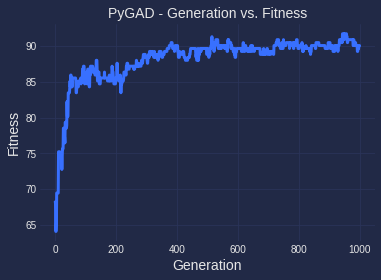

Fitness value of the best solution = 90.08264462809917
Index of the best solution : 0
Best fitness value reached after 944 generations.


In [18]:
verbose = 100
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       # mutation_percent_genes=mutation_percent_genes,
                       # When the set adaptive mutation
                       #mutation_percent_genes= (25,12),
                       #mutation_probability=(0.35,0.12),
                       #mutation_num_genes=(4,2),
                       #sol_per_pop=20,
                       #num_genes=len(array_X),
                       # When the set tournament selection
                       K_tournament=K_tournament,
                       parent_selection_type=parent_selection_type,
                       crossover_probability=crossover_probability,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)


# By calling the run() method from the pygad.GA instance, 
# the genetic algorithm will iterate through the number of generations specified in its num_generations parameter.
ga_instance.run()

#Plot the Fitness Values
#After the run() method completes, the plot_fitness() method can be called to show how the fitness values evolve by generation. 
# A fitness value (i.e. accuracy) of 100 is reached after around 180 generations.
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
#print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Predicting the outputs of the data using the best solution.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs)
#print("Predictions of the trained network : {predictions}".format(predictions=predictions))

## Calculating Some Statistics
Based on the predictions the network made, some statistics can be calculated such as the number of correct and wrong predictions in addition to the classification accuracy.

In [35]:
# Calculating some statistics
num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))

Number of correct classifications : 218.
Number of wrong classifications : 24.
Classification accuracy : 90.08264462809917.


In [36]:
y_pred_tr = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_train)
y_pred_ts = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_test)


print('Train Accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.4f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

Train Accuracy score: 0.4504
Train ROC AUC score: 0.4947
Test Accuracy score: 0.4426
Test ROC-AUC score: 0.4821
[[27  1]
 [33  0]]
              precision    recall  f1-score   support

           0       0.45      0.96      0.61        28
           1       0.00      0.00      0.00        33

    accuracy                           0.44        61
   macro avg       0.23      0.48      0.31        61
weighted avg       0.21      0.44      0.28        61



## PyGAD: 
* Train Accuracy score: 0.8967
* Train ROC AUC score: 0.8955
* Test Accuracy score: 0.8033
* Test ROC-AUC score: 0.7992

## Keras:
* Train Accuracy score: 0.90
* Train ROC AUC score: 0.90
* Test Accuracy score: 0.75
* Test ROC-AUC score: 0.746



### Summary
* Maybe I could preprocess the data.
* Maybe I could use bigger data.
* I could try a different optimizer for Keras. Well then, we could further optimize the genetic algorithm. :D
* My goal here was to create a tutorial. Thank you if you've read this far. Thanks to [Ahmed Fawzy GAD](https://www.linkedin.com/in/ahmedfgad/) for developing this library myself.
* See you in different notebooks.

## Adaptive mutation example

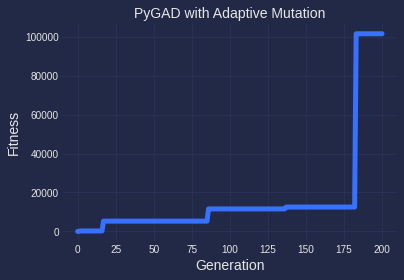

CPU times: user 7.8 s, sys: 55.1 ms, total: 7.86 s
Wall time: 9.85 s


In [37]:
%%time
import pygad
import numpy

function_inputs = np.random.randn(40) # Function inputs.
desired_output = 44 # Function output.

def fitness_func_adaptive(solution, solution_idx):
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    # The value 0.000001 is used to avoid the Inf value when the denominator numpy.abs(output - desired_output) is 0.0.
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=200,
                       fitness_func=fitness_func_adaptive,
                       num_parents_mating=10,
                       mutation_percent_genes= (25,12),
                       mutation_probability=(0.35,0.12),
                       mutation_num_genes=(4,2),
                       sol_per_pop=200,
                       num_genes=len(function_inputs),
                       mutation_type="adaptive")

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness(title="PyGAD with Adaptive Mutation", linewidth=5)

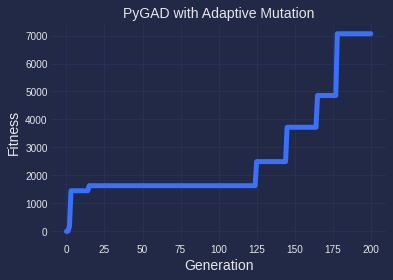

CPU times: user 5.76 s, sys: 71.1 ms, total: 5.83 s
Wall time: 8.69 s


In [38]:
%%time
ga_instance = pygad.GA(num_generations=200,
                       fitness_func=fitness_func_adaptive,
                       num_parents_mating=10,
                       mutation_percent_genes= 10,
                       sol_per_pop=200,
                       num_genes=len(function_inputs),
                       mutation_type="random")

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness(title="PyGAD with Adaptive Mutation", linewidth=5)

[Other informative pages](https://www.generativedesign.org/02-deeper-dive/02-04_genetic-algorithms)